# **Disease Prediction System Using Patient Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries and Load Dataset**
In this step, we import all the necessary Python libraries that will be used throughout the project. This includes Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, and other essential libraries.


In [ ]:
# import all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Training Dataset.csv')

#**Previewing the Dataset**
In this step, we display the first few rows of the dataset using dataset.head(). This helps us verify:

* How symptoms and disease labels are organized

* The naming and formatting of columns


In [ ]:
# Show first few rows to understand structure
dataset.head()

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,watering from eyes,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,prognosis
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Malaria
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne


# **Checking the Dataset Dimensions**

Understanding the size of the dataset is an important first step in data analysis.
By printing the shape of the dataset, we can determine:

* Number of rows → total patient records

* Number of columns → number of symptoms plus the disease label

In [ ]:
# Check the shape (number of rows and columns)
print(dataset.shape)

(2066, 134)


# **Statistical Summary of the Dataset**

This step provides a statistical overview of the dataset using dataset.describe().
Although most symptom columns are binary (0 or 1), this summary is still useful because it helps us understand:

* The distribution of symptom values

* Minimum and maximum values

* Mean occurrence of each symptom

* Standard deviation and variability

In [ ]:
# Overview of dataset statistics
dataset.describe()

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,vomiting,watering from eyes,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,...,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,0.305905,0.075992,0.041626,0.019845,0.013069,0.020329,0.036302,0.019845,0.011617,0.014037,...,0.453533,0.013553,0.013069,0.013069,0.017425,0.067764,0.011133,0.023717,0.256534,0.190223
std,0.460901,0.265050,0.199782,0.139502,0.113597,0.141158,0.187086,0.139502,0.107179,0.117671,...,0.497957,0.115653,0.113597,0.113597,0.130880,0.251401,0.104948,0.152204,0.436826,0.392572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Checking for Missing Values in the Dataset**

In this step, we check whether the dataset contains any missing or null values using dataset.isna().sum().
Identifying missing values is important because they can negatively impact model training and prediction accuracy.

In [ ]:
# Check for missing values in the dataset
print(dataset.isna().sum())  # Check NaNs

abdominal pain           0
abnormal menstruation    0
acidity                  0
acute liver failure      0
altered sensorium        0
                        ..
yellow crust ooze        0
yellow urine             0
yellowing of eyes        0
yellowish skin           0
prognosis                0
Length: 134, dtype: int64


# **Checking the Data Types of All Columns**

In this step, we examine the data type of each column using dataset.dtypes.
This helps us to check:

* Whether symptom columns are properly represented as integers


In [ ]:
# Print datatype of each column
dataset.dtypes

,0
abdominal pain,int64
abnormal menstruation,int64
acidity,int64
acute liver failure,int64
altered sensorium,int64
...,...
yellow crust ooze,int64
yellow urine,int64
yellowing of eyes,int64
yellowish skin,int64


# **Checking for Duplicate Rows in the Dataset**

In this step, we check how many duplicate rows exist in the dataset using dataset.duplicated().sum().
Duplicate entries can negatively affect the learning process of the model by introducing redundant patterns.




In [ ]:
# Count duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


# **Analyzing the Distribution of the Target Variable (‘prognosis’)**

In this step, we analyze how the target variable prognosis (disease labels) is distributed in the dataset.
Understanding this distribution is important because class imbalance can significantly affect model performance.

This analysis helps us identify:

* The number of records belonging to each disease category

* Whether some diseases appear much more frequently than others

* The total number of unique disease classes in the dataset

In [ ]:
# Check the distribution of the target variable ('prognosis')
class_distribution = dataset['prognosis'].value_counts()
print("\nClass Distribution for 'prognosis' (target variable):")
print(class_distribution)
print(f"\nTotal unique diseases (classes): {len(class_distribution)}")


Class Distribution for 'prognosis' (target variable):
prognosis
Migraine                         71
Chicken pox                      71
Dengue                           69
Hepatitis D                      67
Typhoid                          64
Hyperthyroidism                  64
Diabetes                         64
Hypoglycemia                     63
Tuberculosis                     63
Pneumonia                        62
Jaundice                         62
Common Cold                      61
Hepatitis E                      61
Hepatitis B                      61
Hepatitis A                      59
Hypothyroidism                   57
Alcoholic hepatitis              55
Malaria                          54
Varicose veins                   54
GERD                             49
Chronic cholestasis              49
Hepatitis C                      48
Paroxysmal Positional Vertigo    48
Bronchial Asthma                 48
Psoriasis                        47
Covid                            46

# **Visualizing the Distribution of Disease Classes**

In this step, we create a bar plot to visualize the distribution of disease labels in the dataset.
While the previous step displayed the numeric counts, this visualization makes it easier to interpret the imbalance among different disease classes.

This plot helps us understand:

* How many samples belong to each disease category

* Whether certain diseases dominate the dataset

* The extent of class imbalance, which may affect model performance

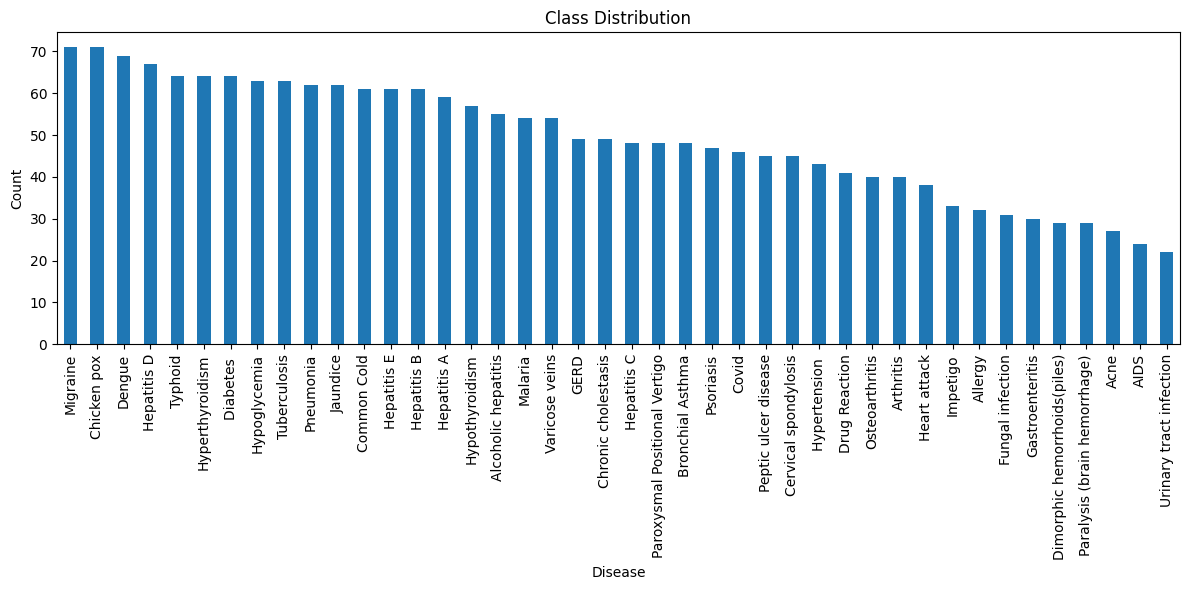

In [ ]:
# Plotting class distribution for disease labels
# Helps visualize how balanced/unbalanced the disease classes are
class_distribution.plot(kind='bar', figsize=(12,6))
plt.title('Class Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Visualizing Symptom Co-Occurrence Using a Correlation Heatmap**

In this step, we compute and visualize the correlation matrix of symptoms to understand how different symptoms co-occur across patient records.
By calculating X.corr(), we can identify which symptoms tend to appear together more frequently.

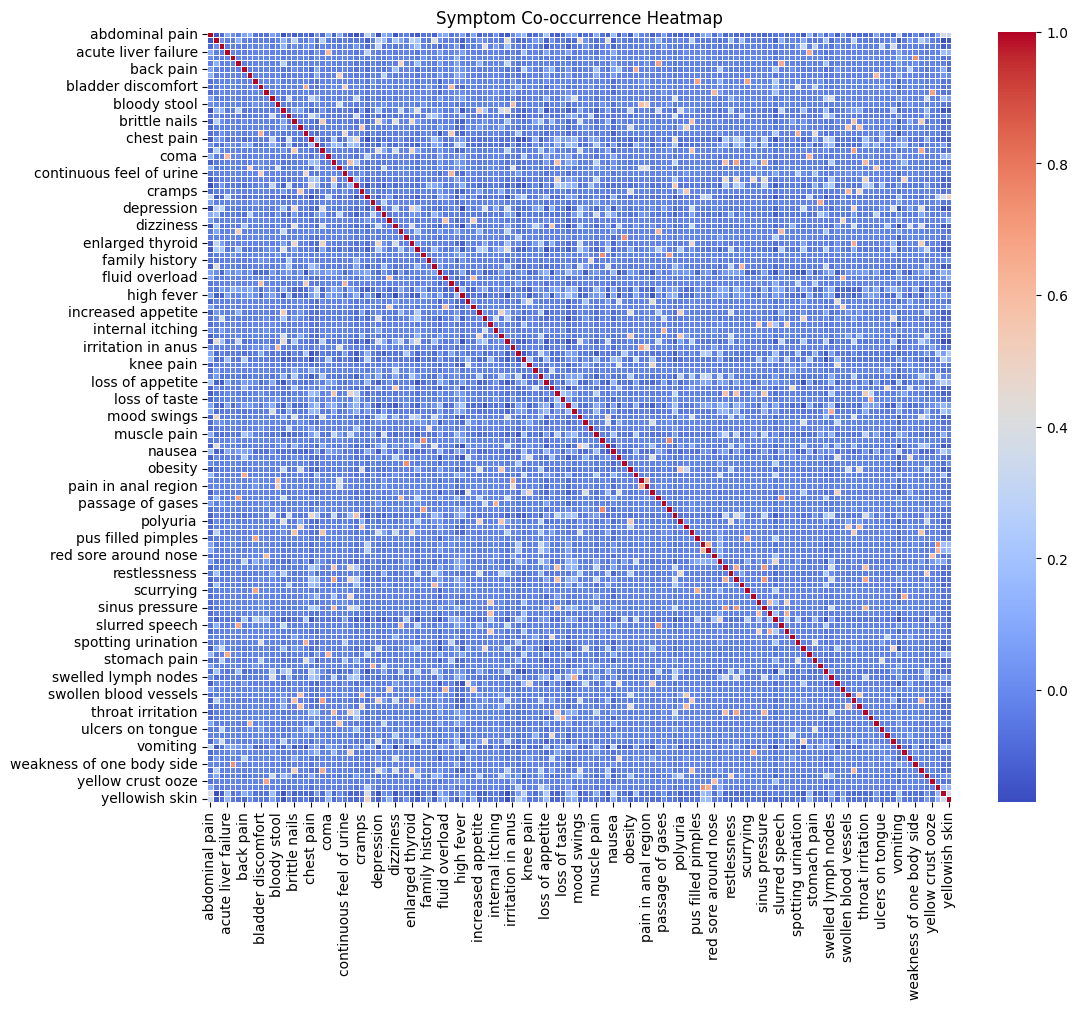

In [ ]:
# Create symptom co-occurrence correlation matrix
# Shows how symptoms relate to each other across records
symptom_corr = X.corr()

# Visualize symptom correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(symptom_corr, cmap='coolwarm', linewidths=0.5)
plt.title('Symptom Co-occurrence Heatmap')
plt.show()

# **Symptom Analysis**

In this step, we analyze how frequently each symptom occurs across the entire dataset.
By calculating the column-wise sum for all symptom features (excluding the target variable prognosis), we can identify which symptoms are most common among patient records.


--- Visualizing Symptom Frequencies ---


/tmp/ipython-input-4071472724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.head(top_n_symptoms).values, y=symptom_counts.head(top_n_symptoms).index, palette='plasma')


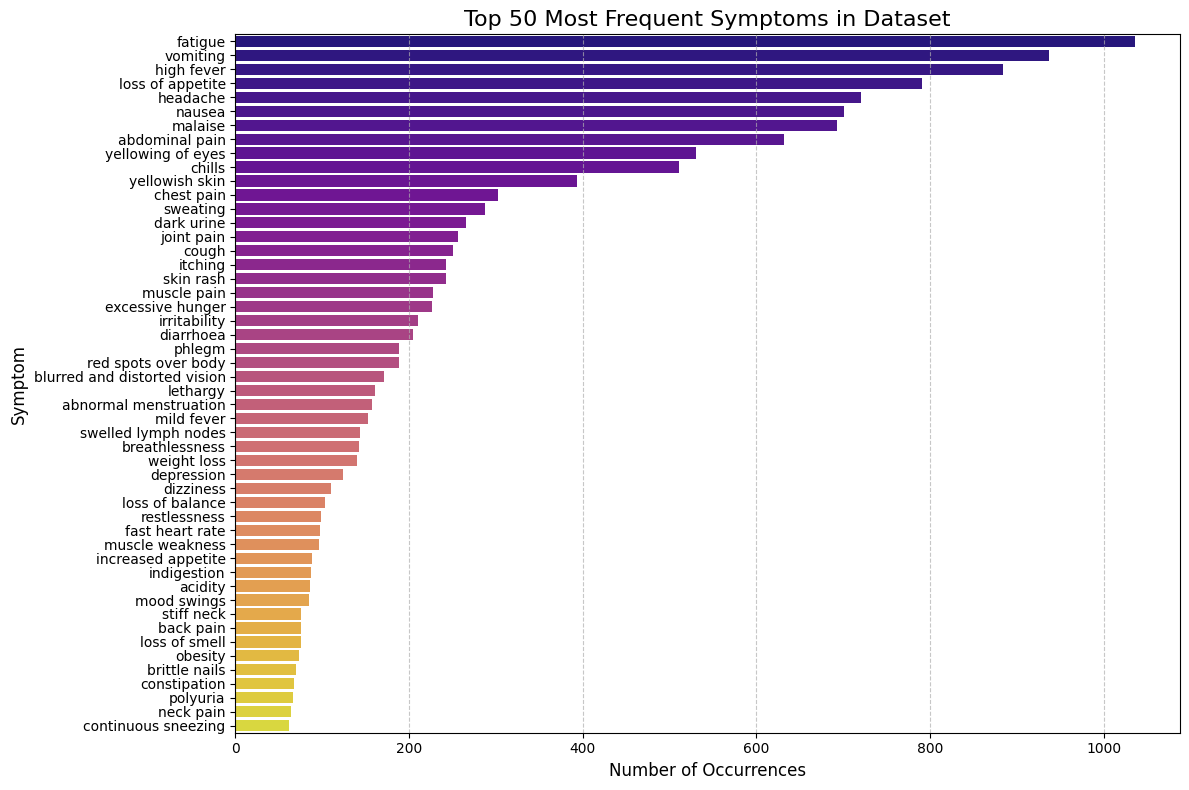

In [ ]:
# --- Symptom Frequency Distribution ---
print("\n--- Visualizing Symptom Frequencies ---")
# Count how many times each symptom is present (column sum)
symptom_counts = dataset.drop('prognosis', axis=1).sum().sort_values(ascending=False)
top_n_symptoms = 50  # Number of top symptoms to visualize

# Plot top N most frequent symptoms in the dataset
plt.figure(figsize=(12, 8))
sns.barplot(x=symptom_counts.head(top_n_symptoms).values, y=symptom_counts.head(top_n_symptoms).index, palette='plasma')
plt.title(f'Top {top_n_symptoms} Most Frequent Symptoms in Dataset', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()
plt.show()


# **Disease–Symptom Relationships**

In this step, we create a disease–symptom matrix to understand how symptoms are distributed across different diseases.
By grouping the dataset by prognosis and summing symptom occurrences, we generate a matrix where:

* Each row represents a disease

* Each column represents a symptom

* Values indicate how often a symptom appears for that disease

This heatmap helps us analyze:

* Which symptoms are strongly associated with specific diseases

* Similarities and overlaps between different diseases

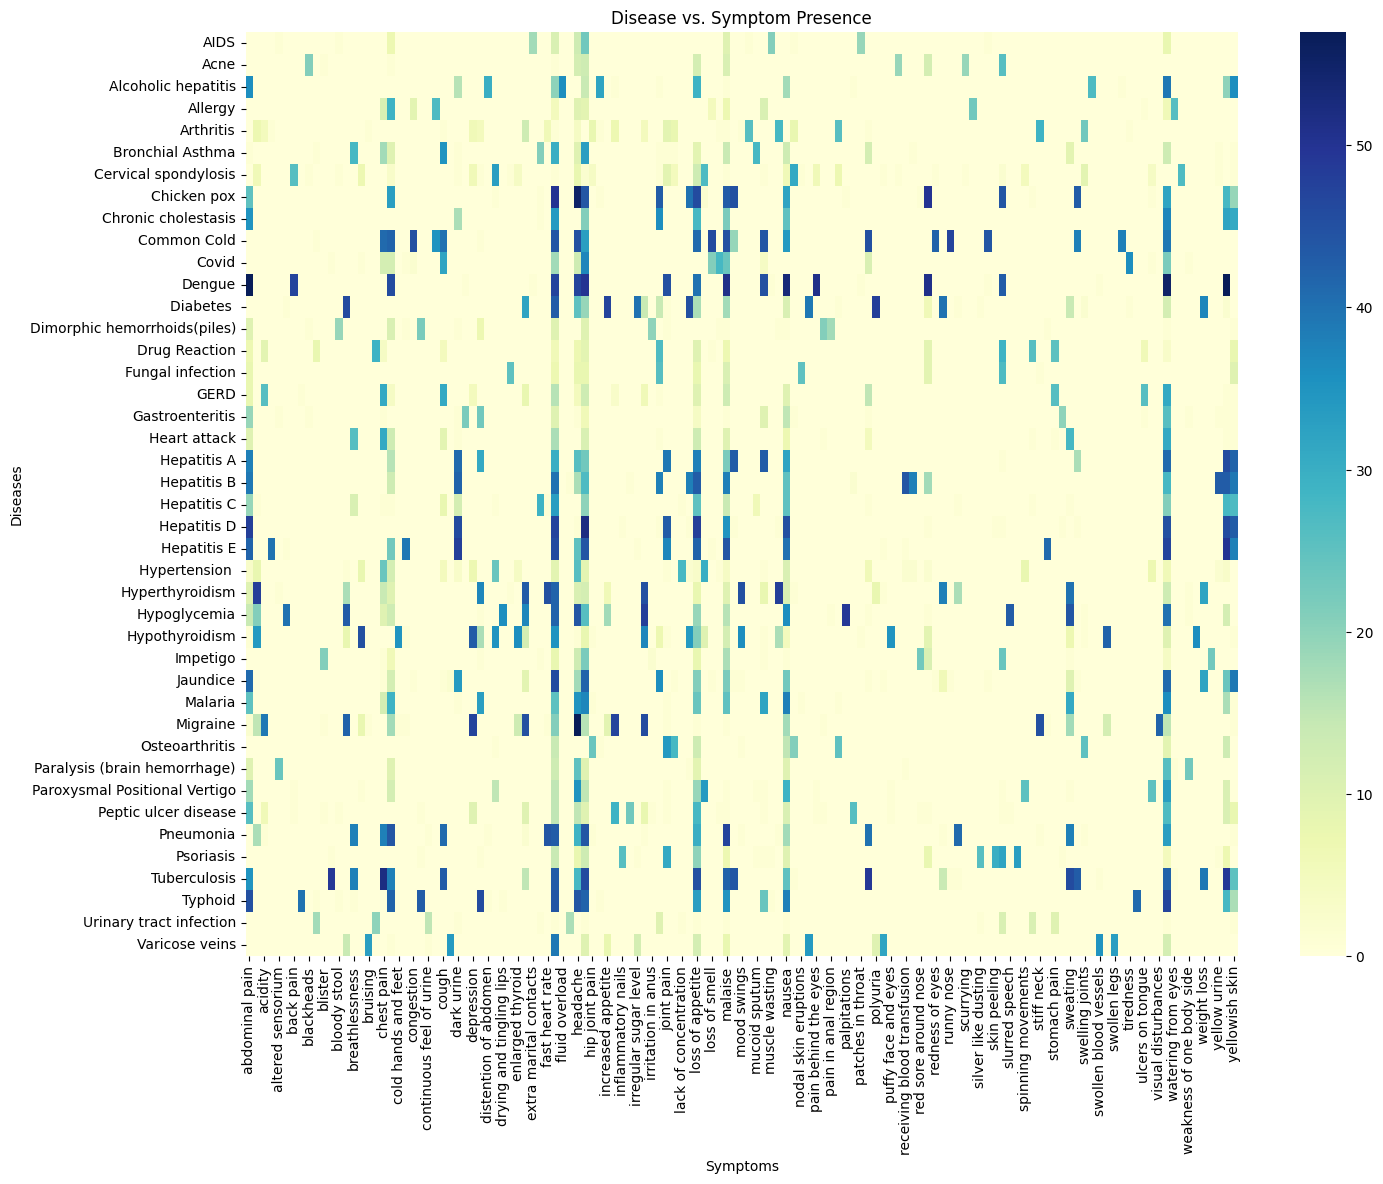

In [ ]:
# Disease-symptom heatmap
# Create matrix of symptom presence across diseases
# Each row is a disease, each column is a symptom (1 if common, 0 if not)
disease_symptom_matrix = dataset.groupby('prognosis').sum()
plt.figure(figsize=(16,12))
sns.heatmap(disease_symptom_matrix, cmap='YlGnBu')  # Heatmap of diseases vs symptoms
plt.title("Disease vs. Symptom Presence")
plt.xlabel("Symptoms")
plt.ylabel("Diseases")
plt.show()


# **Separating Input Features and Target Variable**

In this step, we divide the dataset into two main components:

X – the input features, which include all symptom columns

y – the target variable, which represents the disease label (prognosis)

In [ ]:
# Split dataset into input features X and target label y
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

#**Encoding the Target Variable into Numerical Format**

In this step, we convert the categorical disease labels (prognosis) into numerical values using LabelEncoder().
Machine learning models work with numeric data, so encoding the target variable is essential before training.



In [ ]:
# Encode the categorical target labels into numerical format
le = LabelEncoder()
Y = le.fit_transform(y)

# **Applying SMOTE to Balance Classes**

In this step, we address the issue of class imbalance in the dataset using SMOTE (Synthetic Minority Over-Sampling Technique).
Many diseases may have fewer samples compared to others, which can cause the model to become biased toward majority classes.

SMOTE helps by:

* Generating synthetic samples for minority classes

* Balancing the dataset so all diseases have a more equal number of records

In [ ]:
# Apply SMOTE for class balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# **Verifying Class Distribution After Applying SMOTE**

After balancing the dataset using SMOTE, it's important to check how the class distribution has changed.
This step prints the number of samples for each disease after resampling, allowing us to confirm that previously underrepresented classes now have an equal number of samples.

In [ ]:
# Check class distribution after SMOTE
resampled_distribution = pd.Series(Y_resampled).value_counts().sort_index()
print("\nClass Distribution After SMOTE:")
# Iterate through the resampled distribution and print the count for each disease.
for idx, count in enumerate(resampled_distribution):
    print(f"{le.classes_[idx]}: {count}")  # le.classes_[idx] converts the numerical index back to the original disease name.


Class Distribution After SMOTE:
AIDS: 71
Acne: 71
Alcoholic hepatitis: 71
Allergy: 71
Arthritis: 71
Bronchial Asthma: 71
Cervical spondylosis: 71
Chicken pox: 71
Chronic cholestasis: 71
Common Cold: 71
Covid: 71
Dengue: 71
Diabetes : 71
Dimorphic hemorrhoids(piles): 71
Drug Reaction: 71
Fungal infection: 71
GERD: 71
Gastroenteritis: 71
Heart attack: 71
Hepatitis A: 71
Hepatitis B: 71
Hepatitis C: 71
Hepatitis D: 71
Hepatitis E: 71
Hypertension : 71
Hyperthyroidism: 71
Hypoglycemia: 71
Hypothyroidism: 71
Impetigo: 71
Jaundice: 71
Malaria: 71
Migraine: 71
Osteoarthritis: 71
Paralysis (brain hemorrhage): 71
Paroxysmal Positional Vertigo: 71
Peptic ulcer disease: 71
Pneumonia: 71
Psoriasis: 71
Tuberculosis: 71
Typhoid: 71
Urinary tract infection: 71
Varicose veins: 71


#**Visualizing Class Distribution After SMOTE**

In this step, we create a bar plot to visualize how the disease classes are distributed after applying SMOTE.
While the previous step printed the numerical counts, this visualization provides a clearer, more intuitive understanding of the balanced dataset.

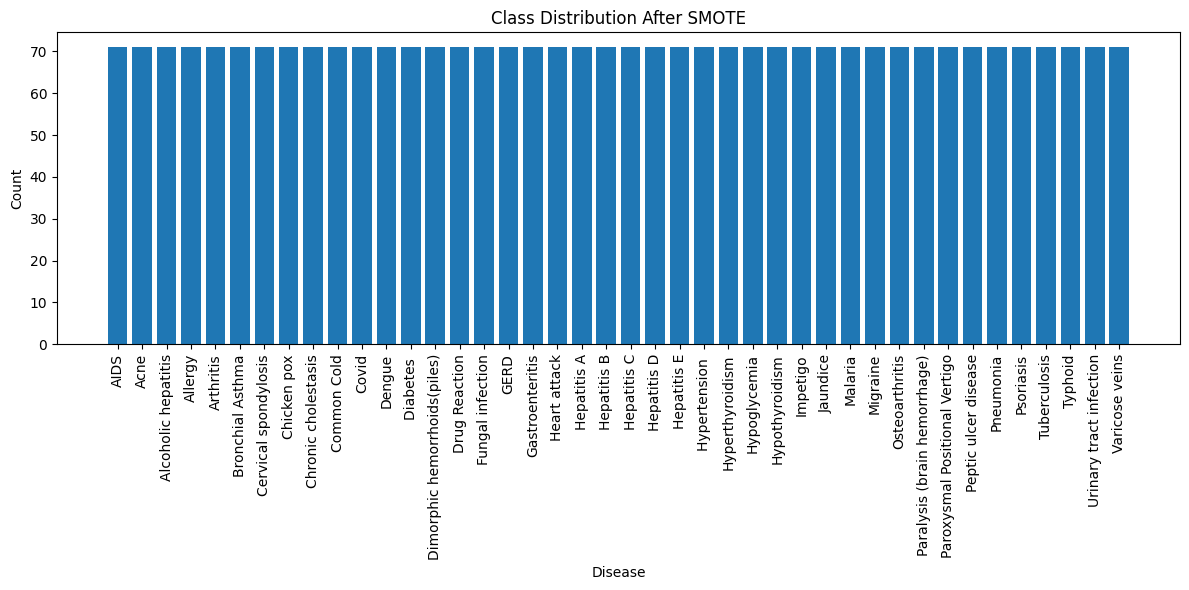

In [ ]:
# Plot class distribution after SMOTE
plt.figure(figsize=(12,6))
plt.bar(le.classes_, resampled_distribution)
plt.xticks(rotation=90)
plt.xlabel("Disease")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.tight_layout()
plt.show()

# **Split Dataset into Train and Test Sets**


In this step, we divide the resampled dataset into training and testing sets using train_test_split().
We apply stratified sampling to ensure that the balanced class distribution created by SMOTE remains consistent in both splits.

In [ ]:
# # Split the dataset into training and testing sets with stratified sampling
# # Ensures disease distribution remains the same in both splits
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=20, stratify=Y_resampled)



# **Training and Evaluating Models for Predicition**

In this step, we train two different machine learning models—Random Forest and XGBoost—to compare their performance on the disease prediction task.
Each model is initialized with predefined hyperparameters and trained using the prepared training dataset.

During this process, we:

* Initialize both models and store them in a dictionary for easy iteration

* Train each model separately using the training data

* Generate predictions for the test set

* Calculate important evaluation metrics

* Print the confusion matrix to visualize model performance across all disease classes

* Store each trained model and its performance metrics for later comparison and analysis

In [ ]:
# Initialize the models we want to train
prediction_models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
}

# Initialize dictionaries to store results for each model
trained_models = {}     # Store trained models for later use
accuracies = {}         # Store accuracy scores
precisions = {}         # Store precision scores
recalls = {}            # Store recall scores
f1_scores = {}          # Store F1 scores

# Loop over each model in your prediction_models dictionary
for name, model in prediction_models.items():
    print(f"\nTraining {name}...")

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict the labels for the test set
    predictions = model.predict(X_test)

    # Calculate performance metrics for multiclass
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Print the metrics with four decimal places
    print(f"{name} Accuracy : {acc:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall   : {recall:.4f}")
    print(f"{name} F1 Score : {f1:.4f}")

    # Print the confusion matrix to visualize prediction results
    cm = confusion_matrix(y_test, predictions)
    print(f"{name} Confusion Matrix:\n{np.array2string(cm, separator=', ')})")

    # Save the trained model and metrics in their respective dictionaries
    trained_models[name] = model
    accuracies[name] = acc
    precisions[name] = precision
    recalls[name] = recall
    f1_scores[name] = f1



Training RandomForest...
RandomForest Accuracy : 0.9307
RandomForest Precision: 0.9340
RandomForest Recall   : 0.9307
RandomForest F1 Score : 0.9303
RandomForest Confusion Matrix:
[[22,  0,  0, ...,  0,  0,  0],
 [ 0, 21,  0, ...,  0,  0,  0],
 [ 0,  0, 20, ...,  0,  0,  0],
 ...,
 [ 1,  0,  0, ..., 18,  0,  0],
 [ 0,  0,  0, ...,  0, 21,  0],
 [ 0,  0,  0, ...,  0,  0, 21]])

Training XGBoost...
XGBoost Accuracy : 0.8972
XGBoost Precision: 0.9013
XGBoost Recall   : 0.8972
XGBoost F1 Score : 0.8972
XGBoost Confusion Matrix:
[[21,  0,  0, ...,  0,  0,  0],
 [ 0, 21,  0, ...,  0,  0,  0],
 [ 0,  0, 20, ...,  0,  0,  0],
 ...,
 [ 1,  0,  0, ..., 19,  0,  0],
 [ 0,  0,  0, ...,  0, 20,  0],
 [ 0,  0,  0, ...,  0,  0, 20]])


# **Comparing Model Accuracies**

In this step, we visually compare the accuracy scores of the different machine learning models trained earlier.
By plotting the accuracies of Random Forest and XGBoost side-by-side, we get a clear understanding of which model performs better for the disease prediction task.

/tmp/ipython-input-3923195535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


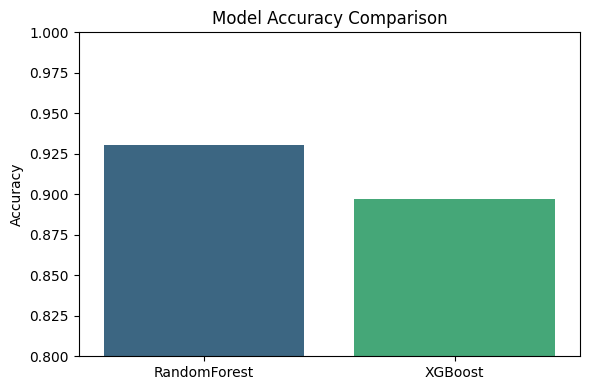

In [ ]:
# Model Accuracy Comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.tight_layout()
plt.show()


# **Hyperparameter Tuning**

In this step, we perform hyperparameter tuning on the Random Forest model to improve its performance.
Instead of manually trying different combinations, we use RandomizedSearchCV, which efficiently searches through a defined set of hyperparameters and selects the best-performing configuration.

During this process, we:

* Define a hyperparameter grid containing values for:

    * n_estimators → number of trees

    * max_depth → maximum tree depth

    *  min_samples_split → minimum samples required to split a node

    * min_samples_leaf → minimum samples needed at a leaf node

    * bootstrap → whether to use bootstrapped samples

* Run 10 randomized combinations using 5-fold cross-validation

* Evaluate each combination using accuracy as the scoring metric

* Identify the best hyperparameters and the corresponding accuracy score



In [ ]:
# Hyperparameter Tuning - RandomForest
rf_random = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=42),  # Base Random Forest model
    param_distributions={  # Hyperparameter grid to search over
        'n_estimators': [100, 200, 300, 400],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],                # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],                # Minimum number of samples to split an internal node
        'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required at a leaf node
        'bootstrap': [True, False]                      # Whether bootstrap samples are used when building trees
    },
    n_iter=10,               # Number of random combinations to try
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Evaluation metric for selecting best model
    random_state=42,
    n_jobs=-1                # Use all available CPU cores for parallel processing
)
rf_random.fit(X_train, y_train)
print("Best RF Params:", rf_random.best_params_) # Print the best combination of hyperparameters found
print("Best RF Accuracy:", rf_random.best_score_)
trained_models['RandomForest'] = rf_random.best_estimator_

Best RF Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best RF Accuracy: 0.934353378541186


In [ ]:
# Hyperparameter Tuning - XGBoost
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(
        eval_metric='mlogloss',         # Set evaluation metric to multi-class log loss
        random_state=42                 # For reproducibility
    ),
    param_distributions={              # Define the hyperparameter search space
        'n_estimators': [100, 200, 300],           # Number of trees in the ensemble
        'max_depth': [3, 5, 7, 10],                # Maximum depth of a tree
        'learning_rate': [0.01, 0.05, 0.1, 0.3],   # Step size shrinkage to prevent overfitting
        'subsample': [0.6, 0.8, 1.0],              # Fraction of samples used for each tree
        'colsample_bytree': [0.6, 0.8, 1.0]        # Fraction of features used per tree
    },
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
xgb_random.fit(X_train, y_train)
print("Best XGB Params:", xgb_random.best_params_)
print("Best XGB Accuracy:", xgb_random.best_score_)
trained_models['XGBoost'] = xgb_random.best_estimator_


Best XGB Params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best XGB Accuracy: 0.9223824767936847


#**Evaluating the Tuned Models**

After completing hyperparameter tuning for both Random Forest and XGBoost, this step evaluates the post-tuning performance of the optimized models.
Using the test dataset, we compute key evaluation metrics to understand how well each tuned model performs on unseen data.

In [ ]:
# Print post-tuning evaluation
for name in ['RandomForest', 'XGBoost']:
    model = trained_models[name]  # Get the best tuned model from the dictionary
    preds = model.predict(X_test)  # Make predictions on the test set

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"\n{name} After Tuning:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")


RandomForest After Tuning:
Accuracy : 0.9330
Precision: 0.9388
Recall   : 0.9330
F1 Score : 0.9328

XGBoost After Tuning:
Accuracy : 0.9162
Precision: 0.9211
Recall   : 0.9162
F1 Score : 0.9169


/tmp/ipython-input-20335030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


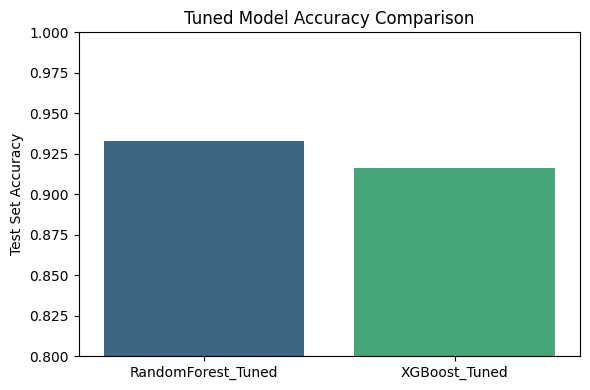

In [ ]:
# Compare RF and XGB after tuning

# Create a dictionary to hold accuracy scores of tuned RandomForest and XGBoost models
comparison_scores = {
    'RandomForest_Tuned': accuracy_score(y_test, trained_models['RandomForest'].predict(X_test)),
    'XGBoost_Tuned': accuracy_score(y_test, trained_models['XGBoost'].predict(X_test))
}

plt.figure(figsize=(6, 4))
sns.barplot(
    x=list(comparison_scores.keys()),        # Model names on X-axis
    y=list(comparison_scores.values()),      # Accuracy values on Y-axis
    palette='viridis'
)
plt.title('Tuned Model Accuracy Comparison')
plt.ylabel('Test Set Accuracy')
plt.ylim(0.8, 1)  # Set Y-axis range
plt.tight_layout()
plt.show()

In [ ]:
# Select best model
# Selecting RandomForest as final model for prediction
Rf = trained_models['RandomForest']

# **Save and Load Trained Model**

In [ ]:
# saving Random Forest
import pickle
# Save the trained RandomForest model to disk
pickle.dump(Rf,open('/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/model/RandomForest.pkl','wb'))
# Load the saved model from disk
Rf = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/model/RandomForest.pkl','rb'))



# **Testing the predictions**


* Select the first test sample from X_test

* Reshape it into a format suitable for prediction

* Use the trained Random Forest model (Rf) to predict the corresponding disease

* Compare the predicted disease with the actual disease label from y_test

In [ ]:
# first test:
print("Disease Predicted :",Rf.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

Disease Predicted : [24]
Actual Disease : 24


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# second test:
print("Disease Predicted :",Rf.predict(X_test.iloc[50].values.reshape(1,-1)))
print("Actual Disease :", y_test[50])

Disease Predicted : [23]
Actual Disease : 23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Building Information Retrieval Function to extract the description, precaution, medication, diet and workout details from the dataset**



In [ ]:
# Build symptom index from training columns
symptoms_list_processed = {symptom.replace('_', ' ').lower(): idx for idx, symptom in enumerate(X_train.columns)}

# Build disease index from label encoder
diseases_list = {index: label for index, label in enumerate(le.classes_)}

def information(predicted_dis):
    # Normalize casing to match the dataset
    predicted_dis = predicted_dis.strip().lower()

    # Match rows where the disease (lowercased) matches predicted one
    def match_disease(df, col):
        return df[df[col].str.lower().str.strip() == predicted_dis]

    # Fetch from all relevant datasets
    disease_description = match_disease(description, 'Disease')['Description']
    disease_description = " ".join(disease_description.values) if not disease_description.empty else "No description available."

    # Fetch up to 4 precautionary measures
    disease_precautions = match_disease(precautions, 'Disease')[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    disease_precautions = disease_precautions.values.tolist()[0] if not disease_precautions.empty else ["No precautions listed."]

    # Fetch medication list
    disease_medications = match_disease(medications, 'Disease')['Medication']
    disease_medications = disease_medications.tolist() if not disease_medications.empty else ["No medications listed."]

    # Fetch dietary recommendations
    disease_diet = match_disease(diets, 'Disease')['Diet']
    disease_diet = disease_diet.tolist() if not disease_diet.empty else ["No diet recommendation listed."]

    # Fetch workout advice
    disease_workout = match_disease(workout, 'disease')['workout']
    disease_workout = disease_workout.tolist() if not disease_workout.empty else ["No workout listed."]

    # Return all the fetched data as a tuple
    return disease_description, disease_precautions, disease_medications, disease_diet, disease_workout



# **Define Prediction Function**

In [ ]:
# Reuse already-loaded 'symptoms' DataFrame for severity
severity_map = dict(zip(symptoms['Symptom'].str.lower().str.replace('_', ' '), symptoms['weight']))

/tmp/ipython-input-142435570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_sorted.head(30), x='weight', y='Symptom', palette='magma')


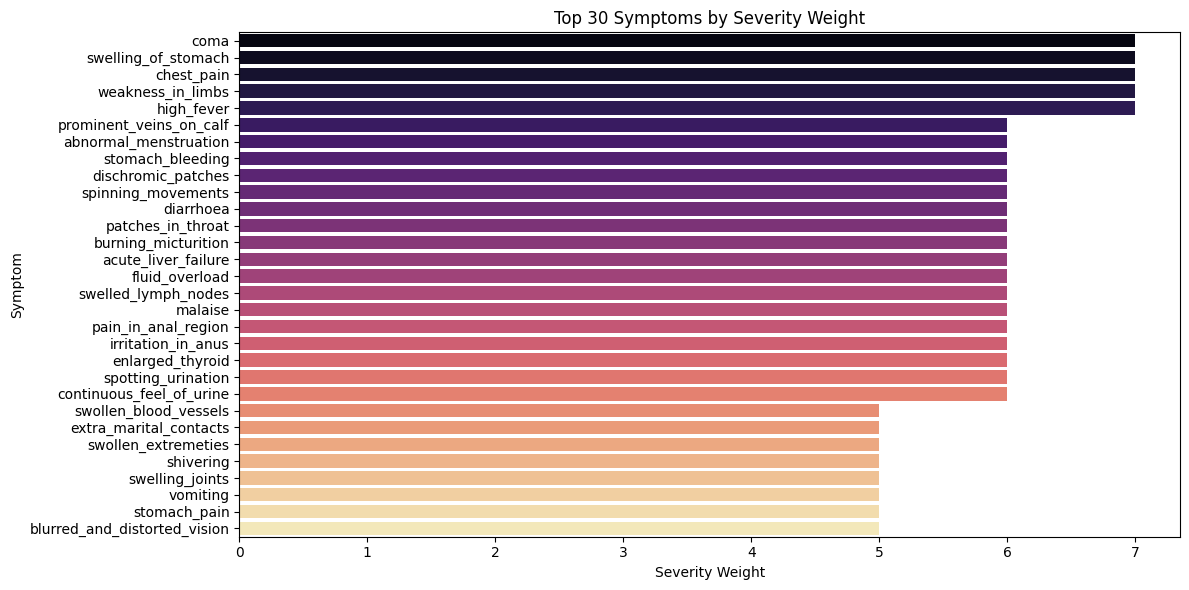

In [ ]:
# Visualizing symptom severity scores
severity_sorted = symptoms.sort_values(by='weight', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=severity_sorted.head(30), x='weight', y='Symptom', palette='magma')
plt.title("Top 30 Symptoms by Severity Weight")
plt.xlabel("Severity Weight")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()


In [ ]:
def predicted_value(patient_symptoms):
    # Initialize an input vector of zeros with the same length as the number of known symptoms
    i_vector = np.zeros(len(symptoms_list_processed))

    # Iterate through each symptom provided by the patient
    for symptom in patient_symptoms:
        # If the symptom is recognized (exists in our processed symptom list)
        if symptom in symptoms_list_processed:
            # Get the index for this symptom in the input vector
            index = symptoms_list_processed[symptom]

            # Retrieve the severity value for the symptom (default to 1 if not found)
            severity = severity_map.get(symptom, 1)

            # Set the corresponding index in the vector with the severity (used as weight)
            i_vector[index] = severity

    # Convert the vector to a DataFrame with correct feature names
    i_vector_df = pd.DataFrame([i_vector], columns=X_train.columns)

    # Use the trained Random Forest model to predict the disease index
    predicted_index = Rf.predict(i_vector_df)[0]

    # Convert the predicted index back to the disease name
    return diseases_list[predicted_index]



# **Install fuzzywuzzy and Define Spell Correction**

In [ ]:
!pip install fuzzywuzzy[speedup]

In [ ]:
from fuzzywuzzy import process

# Defining a function to correct the spelling of symptoms using fuzzy matching
def correct_spelling(symptom):
    # Getting the best match for the symptom from the list of known symptoms
    matched_symptom, score = process.extractOne(symptom, list(symptoms_list_processed.keys()))
    # Check if the similarity score is above the threshold (85 out of 100)
    # A higher score means the match is more confident/accurate.
    if score >= 85:
        # Return the matched symptom if it is similar enough
        return matched_symptom
    else:
        # Return None if no sufficiently close match was found
        return None

# **Load Additional Datasets for Recommendations**

In [ ]:
# Load datasets required for providing recommendations
symptoms = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/Symptom-severity.csv")
precautions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/precautions_df.csv")
workout = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/workout_df.csv")
description = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/description.csv")
medications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/medications.csv')
diets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Disease Prediction System/Recommendations dataset/diets.csv")

# **User Input and Final Prediction**

In [ ]:
# -------------- INPUT & PREDICTION FLOW ---------------- #
print("\n Please enter between 5 to 10 symptoms, separated by commas.")
symptoms_input = input("Describe your symptoms: ")
patient_symptoms = [s.strip().lower() for s in symptoms_input.split(',') if s.strip()]

# Check number of symptoms
if not (5 <= len(patient_symptoms) <= 10):
    print("\n Error: Please enter between 5 to 10 symptoms.")
else:
    # Apply spelling correction
    corrected_symptoms = []
    for symptom in patient_symptoms:
        corrected_symptom = correct_spelling(symptom)
        if corrected_symptom:
            corrected_symptoms.append(corrected_symptom)
        else:
            print(f" Symptom '{symptom}' not found in the database.")

    if corrected_symptoms:
        # Predict the disease
        predicted_disease = predicted_value(corrected_symptoms)
        disease_description, disease_precautions, disease_medications, disease_diet, disease_workout = information(predicted_disease)

        # Printing predicted disease
        print("\nPredicted Disease:", predicted_disease)
        # Printing the description of the disease
        print("\nDescription:\n", disease_description)

        # Print the precautions
        print("\nPrecautions:")
        for idx, prec in enumerate(disease_precautions, 1):
            print(f"{idx}. {prec}")

        # Print the medications
        print("\nMedications:")
        for idx, medic in enumerate(disease_medications, 1):
            print(f"{idx}. {medic}")

        # Printing the workout routine
        print("\nWorkout:")
        for idx, workout in enumerate(disease_workout, 1):
            print(f"{idx}. {workout}")

        # Printing the diets
        print("\nDiets:")
        for idx, diet in enumerate(disease_diet, 1):
            print(f"{idx}. {diet}")



 Please enter between 5 to 10 symptoms, separated by commas.
Describe your symptoms: sneezing, runny nose, cough, congestion, fatigue

Predicted Disease: Common Cold

Description:
 Common Cold is a viral infection of the upper respiratory tract.

Precautions:
1. drink vitamin c rich drinks
2. take vapour
3. avoid cold food
4. keep fever in check

Medications:
1. ['Antibiotics', 'Antiviral drugs', 'Antifungal drugs', 'IV fluids', 'Oxygen therapy']

Workout:
1. Stay hydrated
2. Include nutrient-rich foods
3. Consume foods rich in vitamin C and antioxidants
4. Include zinc-rich foods
5. Limit sugary foods and beverages
6. Consume chicken soup
7. Consult a healthcare professional
8. Rest and conserve energy
9. Gradually resume normal diet
10. Follow medical recommendations

Diets:
1. ['Cold Diet', 'Hydration', 'Warm fluids', 'Rest', 'Honey and lemon tea']
